In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Loading dataset
df = pd.read_csv("GDP_dataset2020-2025.csv")

In [7]:
df.head(5)

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [11]:
df.shape

(196, 7)

In [13]:
df.columns

Index(['Country', '2020', '2021', '2022', '2023', '2024', '2025'], dtype='object')

In [15]:
df.dtypes

Country     object
2020         int64
2021       float64
2022       float64
2023       float64
2024       float64
2025       float64
dtype: object

In [17]:
df.isnull().sum()

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64

In [33]:
#Data cleaning

In [37]:
df.columns = df.columns.str.strip()   # removing spaces

In [39]:
df.head(5)

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [41]:
df_long = df.melt(id_vars=["Country"], 
                  value_vars=[str(y) for y in range(2020, 2026)],
                  var_name="Year", 
                  value_name="GDP")

In [43]:
df_long["Year"] = df_long["Year"].astype(int)
df_long["GDP"] = pd.to_numeric(df_long["GDP"], errors="coerce")
df_long = df_long.dropna()

In [45]:
df.head(5)

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [47]:
# Exploring the data
print("Years available:", df_long["Year"].unique())
print("Number of countries:", df_long["Country"].nunique())

Years available: [2020 2021 2022 2023 2024 2025]
Number of countries: 196


In [69]:
world_gdp = df_long.groupby("Year")["GDP"].sum().reset_index()
print(world_gdp)

   Year          GDP
0  2020   85826173.0
1  2021   97843985.0
2  2022  101948238.0
3  2023  106431753.0
4  2024  110531918.0
5  2025  113237734.0


In [51]:
# Top 10 economies in 2025
top10_2025 = (df_long[df_long["Year"]==2025].sort_values("GDP", ascending=False).head(10))

In [53]:
top10_2025

,Country,Year,GDP
1166,United States,2025,30507217.0
1016,China,2025,19231705.0
1044,Germany,2025,4744804.0
1057,India,2025,4187017.0
1065,Japan,2025,4186431.0
1165,United Kingdom,2025,3839180.0
1040,France,2025,3211292.0
1063,Italy,2025,2422855.0
1012,Canada,2025,2225341.0
1004,Brazil,2025,2125958.0


In [57]:
# Growth (2020 → 2025)
growth = (
    df_long.pivot(index="Country", columns="Year", values="GDP")
    .reset_index())
growth["Growth_%"] = (growth[2025] - growth[2020]) / growth[2020] * 100
fastest = growth.sort_values("Growth_%", ascending=False).head(5)

In [59]:
fastest

Year,Country,2020,2021,2022,2023,2024,2025,Growth_%
70,Guyana,5471.0,8041.0,14718.0,16919.0,24659.0,25822.0,371.979528
191,Venezuela,42838.0,56615.0,89013.0,102377.0,119808.0,108511.0,153.305476
92,Kyrgyzstan,8283.0,9256.0,12269.0,15187.0,17491.0,19849.0,139.635398
71,Haiti,14508.0,21017.0,19826.0,19603.0,26229.0,33548.0,131.237938
62,Georgia,16013.0,18849.0,24985.0,30778.0,33775.0,35353.0,120.776869


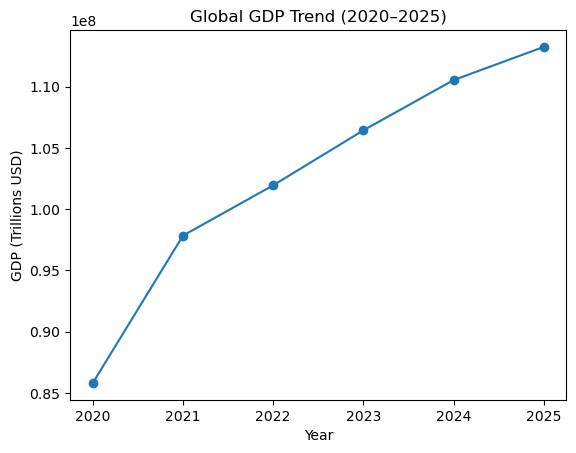

In [71]:
# Global GDP trend
plt.plot(world_gdp["Year"], world_gdp["GDP"], marker="o")
plt.title("Global GDP Trend (2020–2025)")
plt.xlabel("Year")
plt.ylabel("GDP (Trillions USD)")
plt.show()

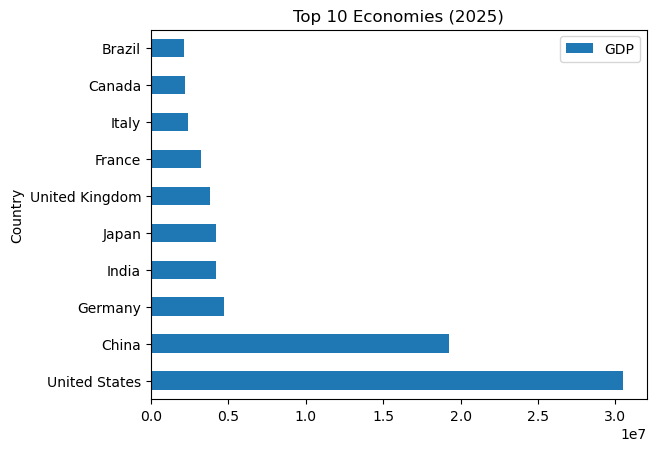

In [73]:
# Top 10 economies in 2025
top10_2025.plot(x="Country", y="GDP", kind="barh", title="Top 10 Economies (2025)")
plt.show()